## Project Objective
- Highest selling  Products by Category

## Project Plan 
1. Import Libraries
2. Conect to the Database
3. Query data into Notebook
4. Perform VisualizationsComment on he findings 
   

In [1]:
import pandas as pd
import seaborn as sns
import pyodbc 
import matplotlib.pyplot as plt

## Connect to the database 


In [59]:
# Define Connection paramters 
database = 'PRACTICE'
server = 'DESKTOP-U507UFU'
#Establish Conection string (DSTD)
conn_str = (
    'Driver={SQL Server};'
    f'Database={database};'
    f'Server={server};'
    'Trusted_Connection = yes;'      
)
conn = pyodbc.connect(conn_str)

## Query Data and Read (Data) into Data Frame 

In [14]:
query = """
  WITH product_cte AS (
  SELECT category, product, SUM(spend) As Total_spend, 
      DENSE_RANK() OVER (PARTITION BY category ORDER BY SUM(spend) DESC) As Ranked_products
      FROM product_spend
      GROUP BY category, product
  ) 
SELECT category, product, Total_spend
 FROM product_cte 
 WHERE  Ranked_products <=2
 ORDER BY category ASC, Total_spend DESC;
"""
df = pd.read_sql(query, conn)


C:\Users\User\AppData\Local\Temp\ipykernel_15300\1082052608.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


### Close Connection

In [57]:
conn.close()

In [15]:
df.head(10)

,category,product,Total_spend
0,appliance,refrigerator,11092.95
1,appliance,microwave,6578.44
2,electronics,television,10362.22
3,electronics,smartphone,8959.97
4,furniture,office chair,12250.25
5,furniture,desk,8780.73


## Perform Visualizations

In [23]:
#Top Perfoming Products

df = df.sort_values(by = 'Total_spend', ascending =  False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 4 to 1
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     6 non-null      object 
 1   product      6 non-null      object 
 2   Total_spend  6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 192.0+ bytes


In [31]:
#Change Data type of product to make it string
df['product'] = df['product'].astype(str)

In [24]:
print(df)

      category       product  Total_spend
4    furniture  office chair     12250.25
0    appliance  refrigerator     11092.95
2  electronics    television     10362.22
3  electronics    smartphone      8959.97
5    furniture          desk      8780.73
1    appliance     microwave      6578.44


## Visual 1: Top-Grossing Product per Category(Hue)

In [29]:
# Strip Whitesppaces if any 
df.columns = df.columns.str.strip()

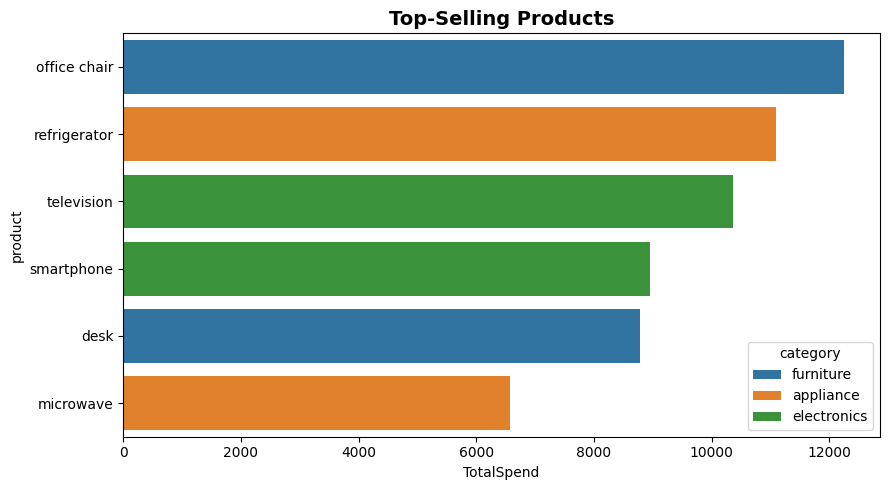

In [54]:
plt.figure(figsize= (9,5))
sns.barplot(
    data = df,
    x = 'Total_spend',
    y = 'product',
    hue = 'category',
    # dodge = False 
)
plt.title('Top-Selling Products', fontweight ='bold', fontsize=14),
plt.xlabel('TotalSpend', fontweight = 10),
plt.ylabel('product',  fontweight= 12)
plt.tight_layout()
# plt.savefig('Top-Selling Products.png', bbox_inches= 'tight', dpi = 300)

## Visual 2: Clustered Products By Category

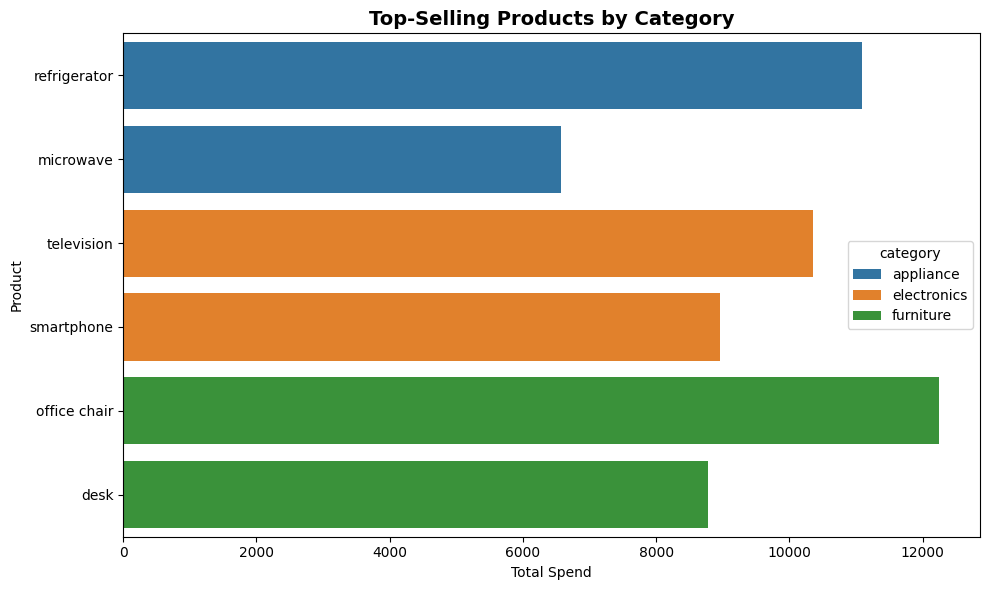

In [52]:

# Sort products by category for clustering
df_sorted = df.sort_values(by='category')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_sorted,
    x='Total_spend',
    y='product',
    hue='category',
    dodge=False  # Keep bars aligned by product
)
plt.title('Top-Selling Products by Category', fontweight='bold', fontsize=14)
plt.xlabel('Total Spend', fontweight=10)
plt.ylabel('Product', fontweight=12)
plt.tight_layout()
plt.savefig('Clustered_Top_Selling_Products.png', bbox_inches='tight', dpi=300)
plt.show()


## Findings 
- Best selling products were Office chairs with a minimum sell of USD 12000 from Furniture Category
- Last best  Selling Product was Micro Wave with  a Microwave with a sell Between 6000 usd to 8000 usd  from Appliance Category 
  

#   Best Grossing Category 

In [60]:
query1 = """
SELECT DISTINCT(category), SUM(spend) AS total_Expenditure
 From product_spend 
 GROUP BY category 
 ORDER BY SUM(spend) DESC;
"""
df1 = pd.read_sql(query1, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_15300\393889137.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


In [128]:
conn.close()

In [61]:
df1.head()

,category,total_Expenditure
0,electronics,42919.43
1,furniture,41265.42
2,appliance,33812.55


## Visualize the Top Grossing category by Total expenditure 

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           3 non-null      object 
 1   total_Expenditure  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


In [66]:
#Strip White spaces if any from the columns
df1.columns = df1.columns.str.strip()

In [68]:
#Sort by highest Earner 
df1 = df1.sort_values(by = 'total_Expenditure', ascending = False)

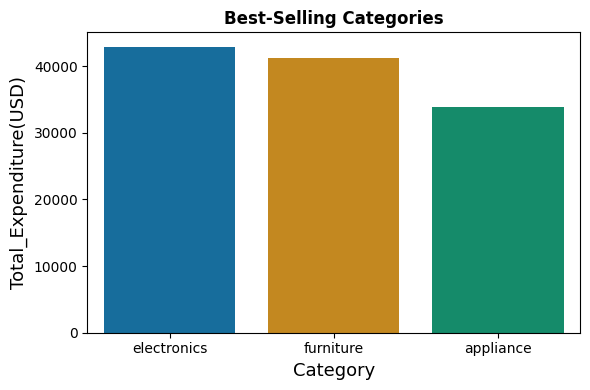

In [92]:
plt.figure(figsize =(6,4))
sns.barplot(
    data = df1, 
    y = 'total_Expenditure',
    x  = 'category',
    palette = 'colorblind',
    hue = 'category'
)
plt.title('Best-Selling Categories', fontweight='bold'),
plt.ylabel('Total_Expenditure(USD)', fontsize = 13 ),
plt.xlabel('Category', fontsize = 13)
plt.tight_layout()
plt.savefig('Best-Selling Categories.png', dpi=300, bbox_inches= 'tight')

### Findings 
- The best grossing Category is Electronics
  ### Recommendation
  - Stock more electronics

# Worst-Selling Product Per Category

In [103]:
# Run Query to fecth Data 
#Read Data Into Data Frame

In [113]:
query2 = """
    WITH product_cte As(
    SELECT category,product,  SUM(spend) As Total_spend,
    DENSE_RANK() OVER (PARTITION by category ORDER BY SUM(spend) ASC) As ranked_product
    FROM product_spend
    GROUP BY category, product
    )
    SELECT category, product, Total_spend
    FROM product_cte 
    WHERE ranked_product <= 2
    ORDER BY category ASC, Total_spend ASC
"""
df3 = pd.read_sql(query2, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_15300\4084444924.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query2, conn)


In [116]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     6 non-null      object 
 1   product      6 non-null      object 
 2   Total_spend  6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 276.0+ bytes


In [117]:
#Perform Basic Data Inspection
df3.head(20)

,category,product,Total_spend
0,appliance,air fryer,4801.97
1,appliance,blender,5337.22
2,electronics,wireless headset,4132.73
3,electronics,computer mouse,4295.77
4,furniture,bookshelf,6156.67
5,furniture,coffee table,6963.44


In [118]:
#Strip White spaces From  Our Columns if any
df3.columns = df3.columns.str.strip()

In [110]:
#Visulaize Findings
#Use  acopy from the original Data 
df3 = df3.head(10).copy()

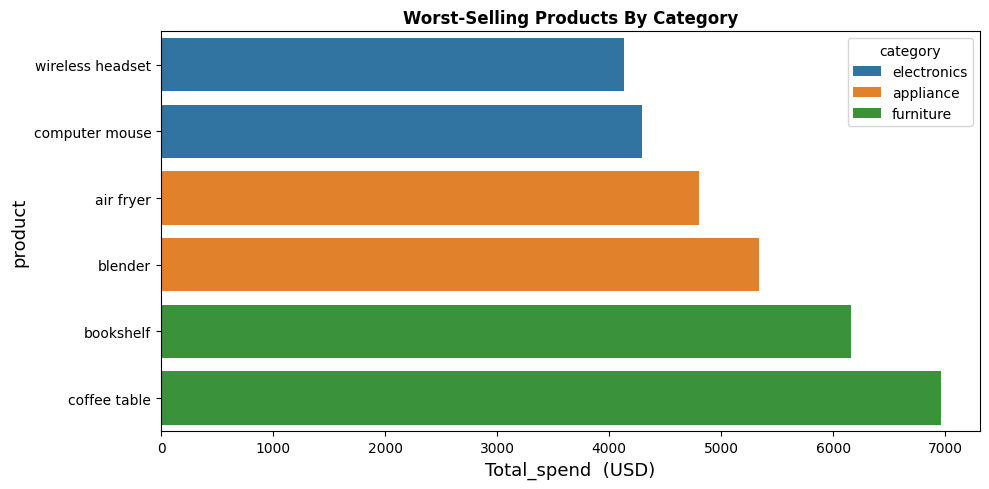

In [127]:
#Step 1
df3 = df3.sort_values(by = 'Total_spend', ascending = True)
#Step 2(Visulalize)
plt.figure(figsize = (10,5))
sns.barplot(
    data = df3,
    x = 'Total_spend',
    y = 'product',
    hue = 'category'
)
plt.xlabel('Total_spend  (USD)', fontsize =13),
plt.ylabel('product', fontsize = 13),
plt.title('Worst-Selling Products By Category', fontweight='bold')
plt.tight_layout()
plt.savefig('Worst-Selling Products.png', dpi=300, bbox_inches = 'tight')

### Findings
 - Worst grossing product is Wireless headset  with price between 4000 and 5000 USD
   ### Recommendation
   - Advertise more
   - Stock less of the product